<IPython.core.display.Javascript object>


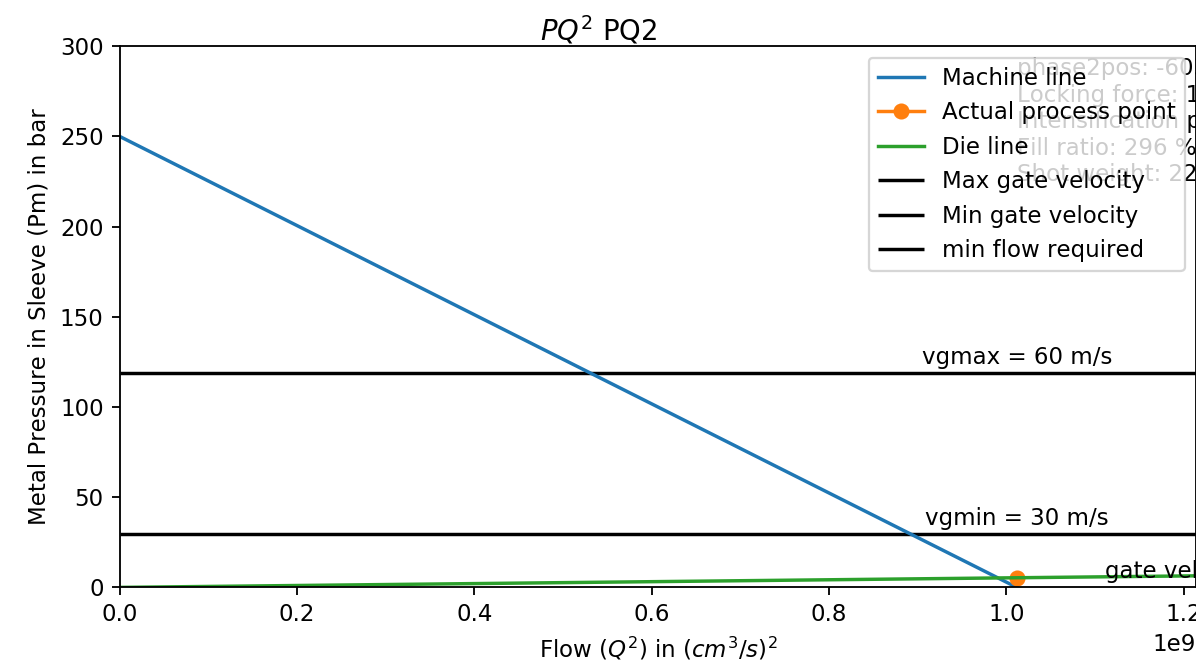

interactive(children=(IntSlider(value=95, description='phs', max=200, step=95), IntSlider(value=245, descripti…

<function __main__.calc_1(phs, Dint, Dinj, Dpl, Ag, vpl, vdry, Ti, Tf, Td, S, tw, dl, Cd, tb, vgmax, vgmin, Wp, Wof, Wrun, Aproj, Ls, Tliq, Tsol, gt)>

In [24]:
# nbi:hide_in
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import *
%matplotlib nbagg

fig,ax= plt.subplots(1,figsize=(7.25,4))

def calc_1(phs,Dint,Dinj,Dpl,Ag,vpl,vdry,Ti,Tf,Td,S,tw,dl,Cd,tb,
           vgmax,vgmin,Wp,Wof,Wrun,Aproj,Ls,Tliq,Tsol,gt):
    Z=3.8
    g=9.81
    cp=962.5 # specific heat in J/kg deg K
    Lf=388442 # Latent heat of fusion in J/kg
    k=96.1 # Thermal conductivity in J/s m degK
    hsurf=65000 #Convective heat transfer coeffecient in W/m^2 degK
    if Ti>Tliq:
        Te=Tliq # Solidification analysis start temperature
    else :
        Te=Ti
    Aint=np.pi*(Dint/10)**2/4
    Ainj=np.pi*(Dinj/10)**2/4
    Finj=phs*Ainj*10/1000
    Apl=np.pi*(Dpl/10)**2/4
    Pm=Finj/Apl*1000/10
    Vm=(Wp+Wof)/dl
    tact=Vm/(Apl*vpl*100)
    Q=Vm/tact
    
    vg=Apl*vpl/Ag
    hc=k/2/(tw/1000)*(3.3+0.02*(2*vg*tw*dl*cp/k)**0.8) #convective heat transfer computed 
                                                      #  variable in W/m^2 degK
    h=(hc*hsurf)/(hc+hsurf) # Convective heat transfer coeffecient 
                            #computed variable in W/m^2 degK
    trec=tw/2*dl*cp/h*(-np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Ti-Td))-
                      Lf/(cp*(Tliq-Tsol))*np.log((Tliq-Td-S/100*(Tliq-Tsol))/(Te-Td))) #Flow time
                                            #Elapsed time from injection to target fraction solid
    xfs=vg*trec
    Agt=Vm/1e6/xfs # Target gate area to achieve conditions
    Qrec=Vm/trec
    Pmax=Aint/Apl*phs
    Wshot=Wp+Wof+Wrun
    Rf=Wshot/dl/(Apl*Ls)
    Qmax=Apl*vdry*100
    Wb=tb*Apl*dl
    s1=(1-Rf)*Ls
    s2=(Wrun-Wb)/dl/Apl
    L1st=s1+s2
    Phase2pos=s1+s2
    Wb=tb*Apl*dl
    L2nd=Ls-(L1st+tb)
    vgmaxp=(dl/(2*g*100))*(vgmax*100/Cd)**2/1000/1.01972
    vgminp=(dl/(2*g*100))*(vgmin*100/Cd)**2/1000/1.01972
    vgp=(dl/(2*g*100))*(vg*100/Cd)**2/1000/1.01972
    Flreq=Aproj*Pmax*10/1000/g
    plt.suptitle('$PQ^2$ '+str(gt))
    ax.clear()
    plt.subplots_adjust(left=0.1,top=0.93,right=1)
    ax.plot([0,Qmax**2],[Pm,0],label='Machine line')
    ax.plot(Q**2,vgp,marker='o',label='Actual process point')
    ax.plot([0,Qmax**2*2],[0,vgp/Q**2*Qmax**2*2],label='Die line')
    ax.hlines(vgmaxp,xmin=0,xmax=Qmax**2*1.2,label='Max gate velocity')
    ax.hlines(vgminp,xmin=0,xmax=Qmax**2*1.2,label='Min gate velocity')
    ax.vlines(Qrec**2,ymin=vgminp,ymax=vgmaxp,label='min flow required')
    ax.set_xlim(0,Qmax**2*1.2)
    ax.set_ylim(0,Pm*1.2)
    ax.legend(loc='upper right')
    ax.set_xlabel('Flow ($Q^2$) in $(cm^3/s)^2$')
    ax.set_ylabel('Metal Pressure in Sleeve (Pm) in bar')
    ax.text(Qmax**2,vgmaxp+5,'vgmax = '+str(vgmax)+' m/s',ha='center')
    ax.text(Qmax**2,vgminp+5,'vgmin = '+str(vgmin)+' m/s',ha='center')
    ax.text(Q**2+1e8,vgp,'gate velocity: '+str(int(round(vg,0))),ha='left')
    ax.text(Q**2,Pm*.9,'phase2pos: '+str(round(Phase2pos*10,0))+' mm' \
            '\nLocking force: '+str(int(round(Flreq,0)))+' tons' \
            '\nIntensification pressure: '+str(int(round(Pmax,0)))+' bar'
            '\nFill ratio: '+str(int(round(Rf*100,0)))+' %'
            '\nShot weight: '+str(int(Wshot)))
    plt.show()
    print('hc ={} W/m^2 degK (convective heat transfer computed)\
          \nh= {} W/m^2 degK (convective heat transfer computed)\
          \ntrec= {} s (Target flow time, Elapsed time from injection to target fraction solid)\
          \nxfs = {}  \
          \nAgt = {} cm^2 (Target gate area to achieve conditions specified)' \
         .format(round(hc,0),round(h,0),round(trec,4),xfs,round(Agt*1e4,2)))
    print('Pressure of metal in sleeve={} \
          \nFill time ={} \
          \nFlow (Qrec)= {} \
          \nFill time rec= {}' \
          .format(round(Pm,0),round(tact,4),round(Qrec,0),round(trec,4)))

widgets.interact(calc_1,phs=(0,200,95),Dint=(0,500,245),Dinj=(0,300,146),Dpl=(0,200,90),
                 Ag=(0,15) ,vpl=(0,10) ,vdry=(0,10),Ti=(550,650),
                 Tf=(500,550),Td=(100,300),S=(0,100),tw=(1,15),dl=(2,3),Cd=(0.1,1),
                 tb=(1,4),vgmax=(20,100),vgmin=(10,50),Wp=(50,20000),
                 Wof=(50,10000),Wrun=(100,15000),Aproj=(100,5000),Ls=(20,100),
                 Tliq=(550,600),Tsol=(500,550),gt='PQ2')

